<a href="https://colab.research.google.com/github/Davidsonity/Clustering---GenderByVoice/blob/main/Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identifying the Gender of a Voice using Unsupervised learning approach**
### **INTRODUCTION**
#### **Objectives**
The objective of this project is to use several unsupervised machine learning approach to best group the data into subsets with similar behavours


#### **About Dataset**
This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.

**Data Source:** https://www.kaggle.com/datasets/primaryobjects/voicegender

**Attribute Information:**
The following acoustic properties of each voice are measured:
- duration: length of signal
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between
- abel: male or female

### Preliminary Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 1.3)
%matplotlib inline

In [ ]:
df = pd.read_csv('voice.csv')
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## **Exploratory Data Analysis**
> Here we would explore the dataset for insights and also check if the dataset requires cleaning.

### Visualizing Numerical Columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


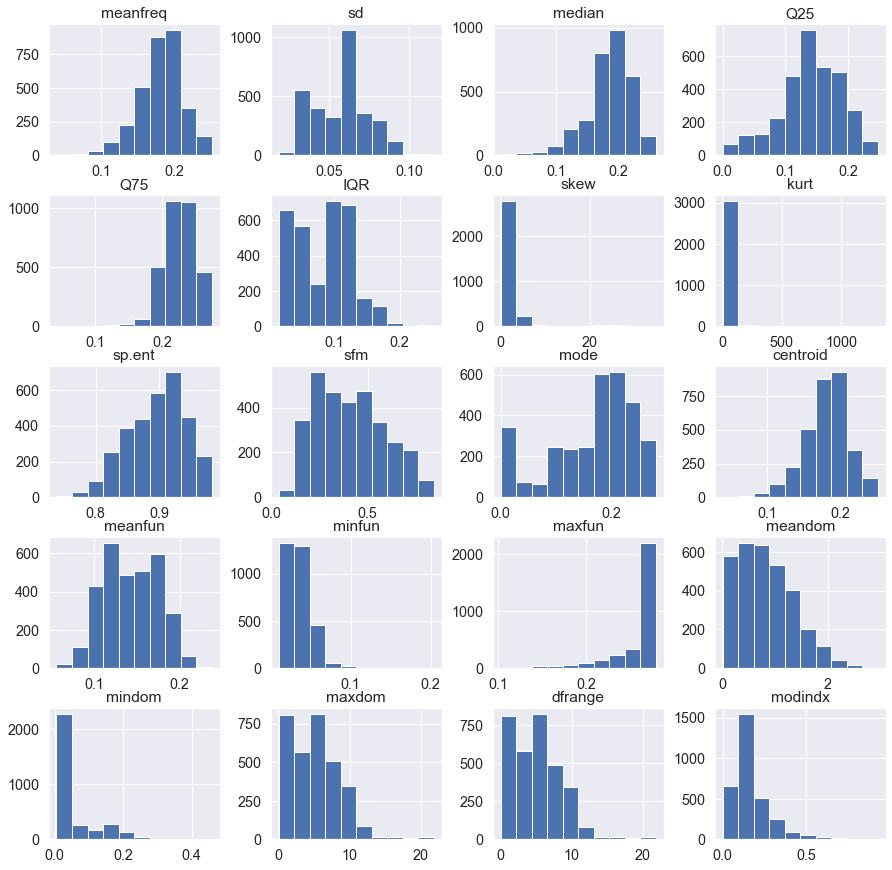

In [ ]:
sns.set(font_scale = 1.3)
df.hist(figsize = (15, 15));

**RESULTS:**
> The dataset is clean, with all features in the right datatype, no null values etc.

**SOME INSIGHT:**
- Some features has skewed distribution
- most people have maximum of dominant frequency less than 10

#### Performing Logorithmic Transformation on Highly skewed columns
> Here we set the skewness threshold to 0.8. 

In [ ]:
features_col = df.columns[:-1]
features_col
X = df[features_col]

In [ ]:
skew_columns = X.skew().sort_values(ascending=False)
skew_columns = skew_columns.loc[abs(skew_columns) > 0.8]
skew_columns

kurt       5.872586
skew       4.933314
modindx    2.064335
minfun     1.878004
mindom     1.661114
mode      -0.837236
Q75       -0.900311
median    -1.012785
maxfun    -2.238535
dtype: float64

In [ ]:
for col in skew_columns.index.tolist():
    df[col] = np.log1p(df[col])

In [ ]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.031525,0.015071,0.086355,0.075122,2.629257,5.618235,0.893369,0.491918,...,0.059781,0.084279,0.015580,0.243622,0.007812,0.007782,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.039441,0.019414,0.088621,0.073252,3.153731,6.454591,0.892193,0.513724,...,0.066009,0.107937,0.015702,0.223144,0.009014,0.007782,0.054688,0.046875,0.051293,male
2,0.077316,0.083829,0.036060,0.008701,0.123905,0.123207,3.458118,6.933353,0.846389,0.478905,...,0.077316,0.098706,0.015534,0.239951,0.007990,0.007782,0.015625,0.007812,0.045462,male
3,0.151228,0.072111,0.146704,0.096582,0.188929,0.111374,0.803270,1.644283,0.963322,0.727232,...,0.151228,0.088965,0.017641,0.223144,0.201497,0.007782,0.562500,0.554688,0.220836,male
4,0.135120,0.079146,0.117477,0.078720,0.187346,0.127325,0.742496,1.674048,0.971955,0.783568,...,0.135120,0.106398,0.016789,0.236389,0.712812,0.007782,5.484375,5.476562,0.189193,male


### PERFROMING CLUSTERING OPERATIONS

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['kmeans'] = kmeans.predict(X_scaled)

In [ ]:
kmeans_df = df[['label', 'kmeans']].groupby(['kmeans', 'label']).size().to_frame().rename(columns={0:'number'})
kmeans_df

number
kmeans label         
0      female    1170
       male       746
1      female     414
       male       838

#### Plotting Pie Chart Of Distributions In Each Cluster

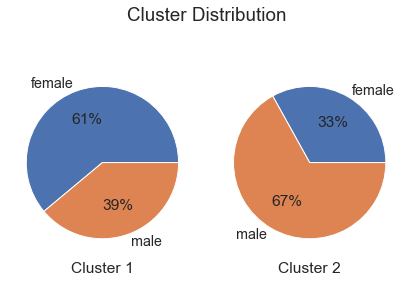

In [ ]:
# Creating dataframe with only label as index, i.e droping ('kmeans')index
pie_data  = kmeans_df.droplevel('kmeans')

# set the default color
color = sns.color_palette()

# set subplots
fig, axs = plt.subplots(ncols=2)

#create pie chart
axs[0].pie(pie_data[:2]['number'], labels = pie_data[:2].index, colors = color, autopct='%.0f%%')
axs[1].pie(pie_data[2:]['number'], labels = pie_data[2:].index, colors = color, autopct='%.0f%%');

# title and labels
fig.suptitle('Cluster Distribution');
    
axs[0].set_xlabel('Cluster 1')
axs[1].set_xlabel('Cluster 2')

fig.tight_layout();

**INSIGHT:**
- Cluster 1: 61% female and 39% male
- Cluster 2: 33% female and 67% male

We can deduce from the above information that the kmeans algorithm has done a good job in clustering this data.

#### Finding the best number of clusters using elbow method

In [ ]:
km_inertia = list()
for clust in np.arange(1,21):
    kmeans = KMeans(n_clusters=clust, random_state=42)
    kmeans.fit(X_scaled)
    km_inertia.append(kmeans.inertia_)

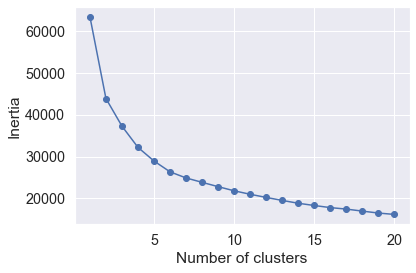

In [ ]:
#Plot 
plt.plot(np.arange(1,21), km_inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Answer:** The best number of cluster to select using Kmeans algorithm is 4 (i.e where the elbow appears)

### Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag.fit(X_scaled)
df['agglom'] = ag.fit_predict(X_scaled)

In [ ]:
agglom_df = df[['label', 'agglom']].groupby(['agglom', 'label']).size().to_frame().rename(columns={0:'number'})
agglom_df

number
agglom label         
0      female     477
       male       875
1      female    1107
       male       709

#### Plotting Pie Chart Of Distributions In Each Cluster

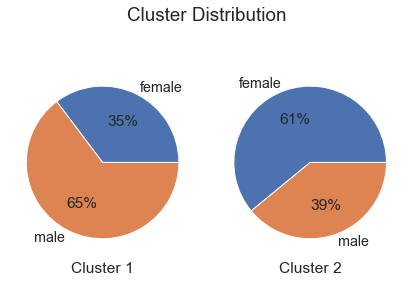

In [ ]:
# Creating dataframe with only label as index, i.e droping ('kmeans')index
pie_data  = agglom_df.droplevel('agglom')

# set the default color
color = sns.color_palette()

# set subplots
fig, axs = plt.subplots(ncols=2)

#create pie chart
axs[0].pie(pie_data[:2]['number'], labels = pie_data[:2].index, colors = color, autopct='%.0f%%')
axs[1].pie(pie_data[2:]['number'], labels = pie_data[2:].index, colors = color, autopct='%.0f%%');

# title and labels
fig.suptitle('Cluster Distribution');
    
axs[0].set_xlabel('Cluster 1')
axs[1].set_xlabel('Cluster 2')

fig.tight_layout();

**INSIGHT:**
- Cluster 1: 35% female and 65% male
- Cluster 2: 61% female and 39% male

We can deduce from the above information that although the Agglomerative algorithm has done a good job in clustering this data, but the Kmeans algorithm has done a better job.

##### Visualizing the dendrogram

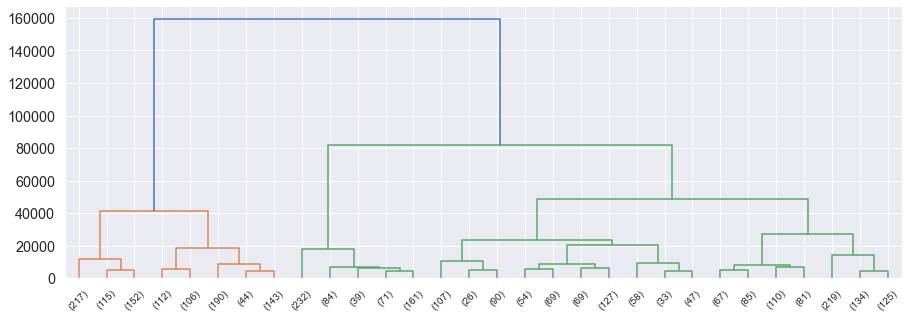

In [ ]:
## Plotting dendogram
from scipy.cluster import hierarchy

z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(z, orientation='top',
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=3, min_samples=10)
db.fit(X_scaled)
df['dbscan'] = db.fit_predict(X_scaled)

In [ ]:
labels = db.labels_
labels

array([-1, -1, -1, ...,  0,  0,  0], dtype=int64)

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

In [ ]:
dbscan_df = df[['label', 'dbscan']].groupby(['dbscan', 'label']).size().to_frame().rename(columns={0:'number'})
dbscan_df

number
dbscan label         
-1     female      19
       male        19
 0     female    1565
       male      1565

**INSIGHT**: We cannot use dbscan for this problem because we cannot explicitly specify the number of cluster we want.